In [1]:
# import packages
import numpy as np # NumPy is a Python package that stands for ‘Numerical Python’. It is the core library for scientific computing
import pandas as pd # Pandas is used for data manipulation, analysis and cleaning.
import matplotlib.pyplot as plt # powerful plotting library for python that offers a varied spectrum of 1D, 2D, and 3D visualizations. 
from IPython.display import display, HTML, display_html # Display the HTML representation of an object.
import seaborn as sns # Seaborn is a data visualization library in Python based on matplotlib



In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from pandas import read_csv #  imports a CSV file to DataFrame format.
dataset = read_csv('income.csv')# read csv

In [4]:
dataset.head() # return top  n (5 by default) rows of a data frame

,age,workclass,fnlwght,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,predictions,predictions.1,actions
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False,0,0


In [268]:
dataset.info() #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwght         32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
 15  predictions     32561 non-null  bool  
 16  predictions.1   32561 non-null  int64 
 17  actions         32561 non-null  int64 
dtypes: boo

In [269]:
dataset.shape # rows, columns

(32561, 18)

In [270]:
display(dataset.iloc[:,:].dtypes)

age                int64
workclass         object
fnlwght            int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
predictions         bool
predictions.1      int64
actions            int64
dtype: object

In [271]:
display(dataset.iloc[:,:].isnull().any()) # which column has null values (missing values)

age               False
workclass         False
fnlwght           False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
predictions       False
predictions.1     False
actions           False
dtype: bool

In [274]:
data = dataset.drop_duplicates()

In [275]:
data.to_csv("income.csv", index=False)

In [276]:
from pandas import read_csv #  imports a CSV file to DataFrame format.
data = read_csv('income.csv')# read csv

In [277]:
nu = ['int16', 'int32','int64', 'float16', 'float32', 'float64']    # selecting only numerical features from the dataset
nu_features = list(data.select_dtypes(include=nu).columns)

In [278]:
outlier = data[nu_features]

In [279]:
sorted(outlier)

['actions',
 'age',
 'capital-gain',
 'capital-loss',
 'education-num',
 'fnlwght',
 'hours-per-week',
 'predictions.1']

In [280]:
Q1 = data.quantile(0.25) 
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                   20.0
fnlwght           119177.0
education-num          3.0
capital-gain           0.0
capital-loss           0.0
hours-per-week         5.0
predictions            1.0
predictions.1          1.0
actions                1.0
dtype: float64


In [281]:
outlier_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis = 1)]
print(outlier_out.shape)

(18985, 18)


In [282]:
outlier_out.to_csv("income.csv", index = False)

In [283]:
from pandas import read_csv #  imports a CSV file to DataFrame format.
outlier = read_csv('income.csv')# read csv

In [284]:
X = outlier.drop(['income'], axis = 1)
X.head()

,age,workclass,fnlwght,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predictions,predictions.1,actions
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False,0,0
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False,0,0
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False,0,0
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,True,0,0
4,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,True,1,1


In [285]:
X = pd.get_dummies(X)
X.head()

,age,fnlwght,education-num,capital-gain,capital-loss,hours-per-week,predictions,predictions.1,actions,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ ?,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,38,215646,9,0,0,40,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,53,234721,7,0,0,40,False,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,338409,13,0,0,40,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,37,284582,14,0,0,40,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,52,209642,9,0,0,45,True,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [287]:
# converting type of columns to 'category'
outlier['income'] = outlier['income'].astype('category')
# Assigning numerical values and storing in another column
outlier['income'] = outlier['income'].cat.codes
outlier.head()

,age,workclass,fnlwght,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,predictions,predictions.1,actions
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,False,0,0
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,False,0,0
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,False,0,0
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,True,0,0
4,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1,True,1,1


In [288]:
y = outlier['income']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: income, dtype: int8

In [289]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
depth = []
for i in range(3,6):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.9593888131142387), (4, 0.9609162211443427), (5, 0.9612849332916431)]


In [290]:
clf.fit(x_train,y_train) # here X is the features data frame w/ dummy coded columns  #clf.fit(x_train,y_train)
clf.score(x_test,y_test)  #clf.fit(x_test,y_test)

0.964185393258427

In [291]:
# Predicting the values of X_test
y_pred = clf.predict(x_test)

In [292]:
# Generation of confusion matrix and classification report with accuracy, precsion, recall, f1-score and support
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4395  108]
 [  96 1097]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4503
           1       0.91      0.92      0.91      1193

    accuracy                           0.96      5696
   macro avg       0.94      0.95      0.95      5696
weighted avg       0.96      0.96      0.96      5696



In [293]:
cmdt=confusion_matrix(y_test, y_pred) # Confusion Matrix before scaling


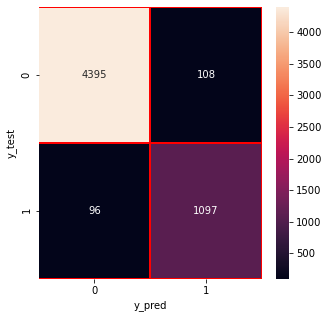

In [294]:
import seaborn as sns
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [295]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X) # Feature scaling with standardization
X_std

array([[-0.00418702,  0.40278378, -0.57896223, ...,  0.32135016,
        -0.0459497 , -0.02295668],
       [ 1.24305   ,  0.62211804, -1.50813066, ...,  0.32135016,
        -0.0459497 , -0.02295668],
       [-0.83567837,  1.8143765 ,  1.27937463, ..., -3.11187028,
        -0.0459497 , -0.02295668],
       ...,
       [-0.9188275 ,  0.8817661 ,  0.81479041, ...,  0.32135016,
        -0.0459497 , -0.02295668],
       [ 0.16211125, -0.30175348, -0.57896223, ...,  0.32135016,
        -0.0459497 , -0.02295668],
       [ 1.65879567, -0.33008584, -0.57896223, ...,  0.32135016,
        -0.0459497 , -0.02295668]])

In [296]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
xstd_train,xstd_test,ystd_train,ystd_test = train_test_split(X_std,y,test_size=0.3,random_state=0)
depth = []
for i in range(3,6):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_std, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.9593888131142387), (4, 0.9609688970819743), (5, 0.9612322573540114)]


In [297]:
clf.fit(xstd_train,ystd_train) # here X is the features data frame w/ dummy coded columns  #clf.fit(x_train,y_train)
clf.score(xstd_test,ystd_test)  #clf.fit(x_test,y_test)

0.964185393258427

In [298]:
# Generation of confusion matrix and classification report with accuracy, precsion, recall, f1-score and support
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ystd_test, y_pred))
print(classification_report(ystd_test, y_pred))

[[4395  108]
 [  96 1097]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4503
           1       0.91      0.92      0.91      1193

    accuracy                           0.96      5696
   macro avg       0.94      0.95      0.95      5696
weighted avg       0.96      0.96      0.96      5696



In [299]:
cmdt=confusion_matrix(ystd_test, y_pred) # Confusion Matrix before scaling


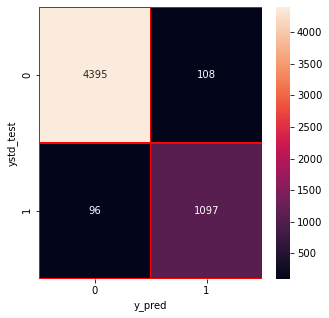

In [300]:
import seaborn as sns
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("ystd_test")
plt.show()

In [301]:
# Building of Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xstd_train,ystd_train)

LogisticRegression()

In [302]:
# Predicting the values of X_test
y_pred = lg.predict(xstd_test)

In [303]:
# Generation of confusion matrix and classification report with accuracy, precsion, recall, f1-score and support
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ystd_test, y_pred))
print(classification_report(ystd_test, y_pred))

[[4403  100]
 [  94 1099]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4503
           1       0.92      0.92      0.92      1193

    accuracy                           0.97      5696
   macro avg       0.95      0.95      0.95      5696
weighted avg       0.97      0.97      0.97      5696



In [304]:
cmlg=confusion_matrix(ystd_test, y_pred) # Confusion Matrix before scaling


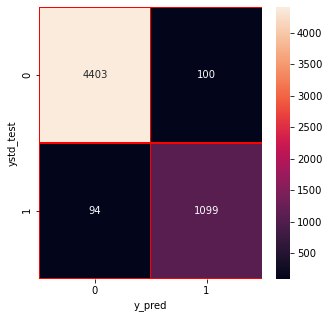

In [305]:
import seaborn as sns
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmlg,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("ystd_test")
plt.show()